# EDA

In this dataset, we are presented with sales data. Following columns are available:

- date
- country
- store
- product
- num_sold - quantity of product sold in given day

The task is to use this data to predict sales for the next year.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "./data/"
df_train = pd.read_csv(data_path + "train.csv")
df_test = pd.read_csv(data_path + "test.csv")

# drop id
df_train.drop('id', axis=1, inplace=True)

df_train['date'] = pd.to_datetime(df_train['date'])

df_train.head(10)

,date,country,store,product,num_sold
0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
5,2017-01-01,Argentina,Kaggle Store,Using LLMs to Improve Your Coding,88
6,2017-01-01,Argentina,Kaggle Store,Using LLMs to Train More LLMs,98
7,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win Friends and Influence People,14
8,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win More Kaggle Competitions,83
9,2017-01-01,Argentina,Kaggle Store,Using LLMs to Write Better,69


In [3]:
# check if there are any null values
df_train.isnull().sum()

date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

### date column

In [4]:
start_date = df_train['date'].min()
end_date = df_train['date'].max()
number_of_years = (end_date - start_date).days / 365
print("Start date: ", start_date)
print("End date: ", end_date)
print("Number of years: ", number_of_years)

Start date:  2017-01-01 00:00:00
End date:  2021-12-31 00:00:00
Number of years:  5.0


### Total sales

In [5]:
# group by date and sum the num_sold as total_sales

total_sales_daily = df_train[['date', 'num_sold']].groupby('date').sum().reset_index()
total_sales_weekly = df_train[['date', 'num_sold']].groupby('date').sum().resample('W').sum().reset_index()

total_sales_daily.columns = ['date', 'num_sold']
total_sales_weekly.columns = ['date', 'num_sold']

total_sales_daily

,date,num_sold
0,2017-01-01,20086
1,2017-01-02,15563
2,2017-01-03,15039
3,2017-01-04,14516
4,2017-01-05,14083
...,...,...
1821,2021-12-27,16724
1822,2021-12-28,18507
1823,2021-12-29,20110
1824,2021-12-30,20156


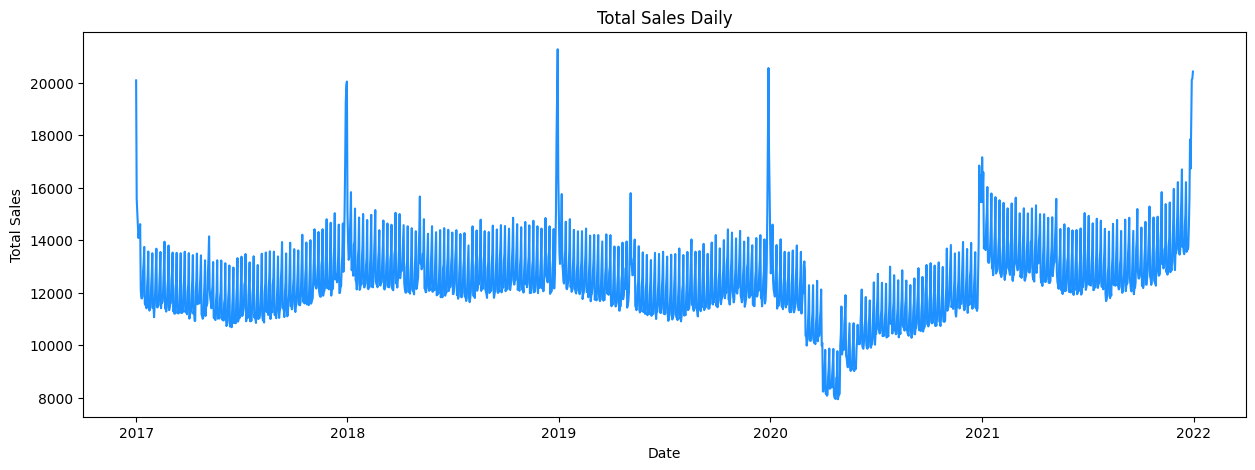

In [6]:
def plot_time_series_data(df, title='Total Sales Daily', color='dodgerblue'):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df['date'], df['num_sold'], color=color)
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Sales')
    ax.set_title(title)
    plt.show()

plot_time_series_data(total_sales_daily, title='Total Sales Daily')

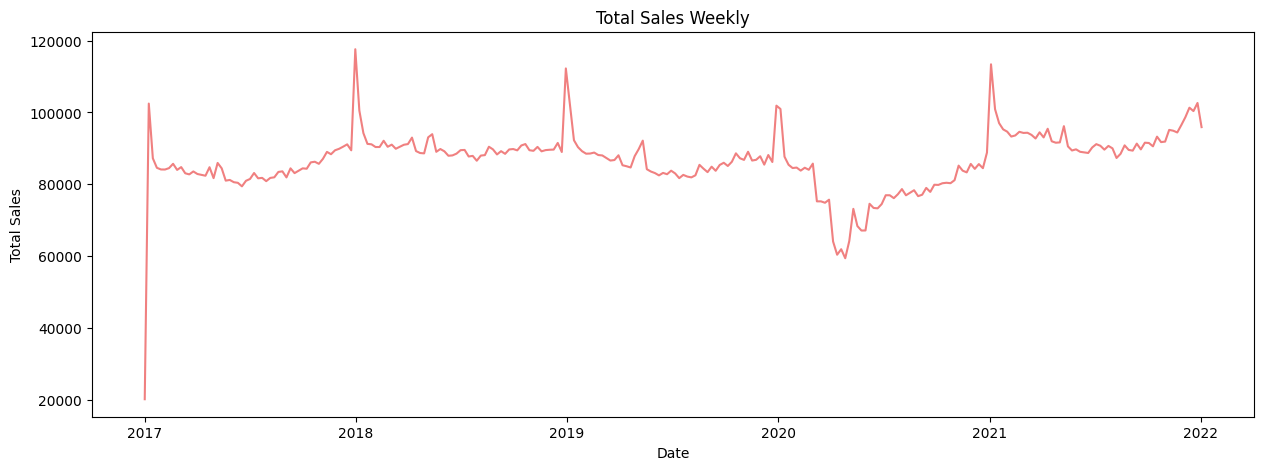

In [7]:
plot_time_series_data(total_sales_weekly, title='Total Sales Weekly', color='lightcoral')

In [8]:
total_sales_daily['day'] = total_sales_daily['date'].dt.day
total_sales_daily['month'] = total_sales_daily['date'].dt.month
total_sales_daily['year'] = total_sales_daily['date'].dt.year
total_sales_daily['weekday'] = total_sales_daily['date'].dt.weekday

weekend_days = [4, 5, 6] # friday, saturday, sunday
total_sales_daily['is_weekend'] = total_sales_daily['weekday'].apply(lambda x: 1 if x in weekend_days else 0)

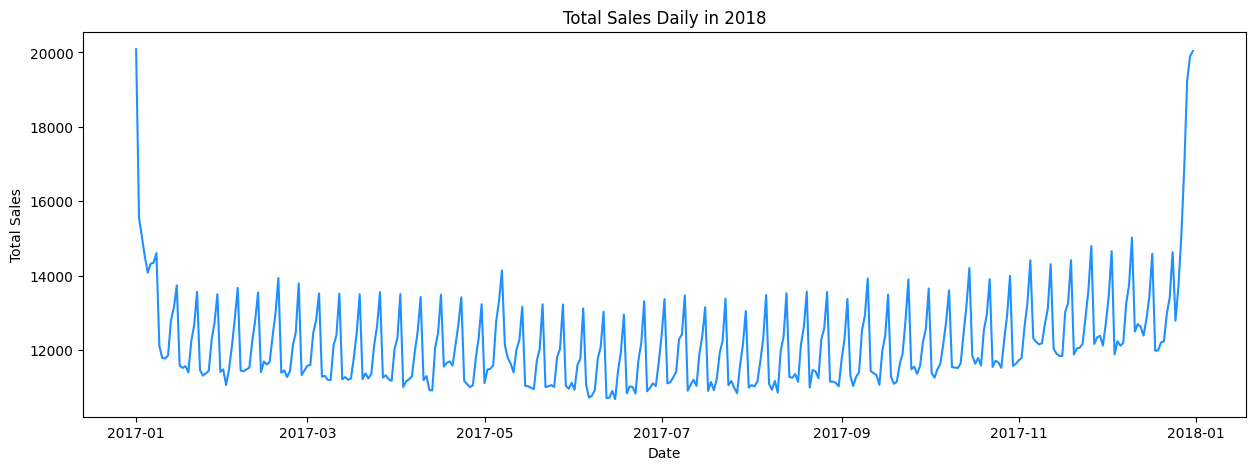

In [9]:
plot_time_series_data(total_sales_daily[ total_sales_daily['year'] == 2017 ], title='Total Sales Daily in 2018')

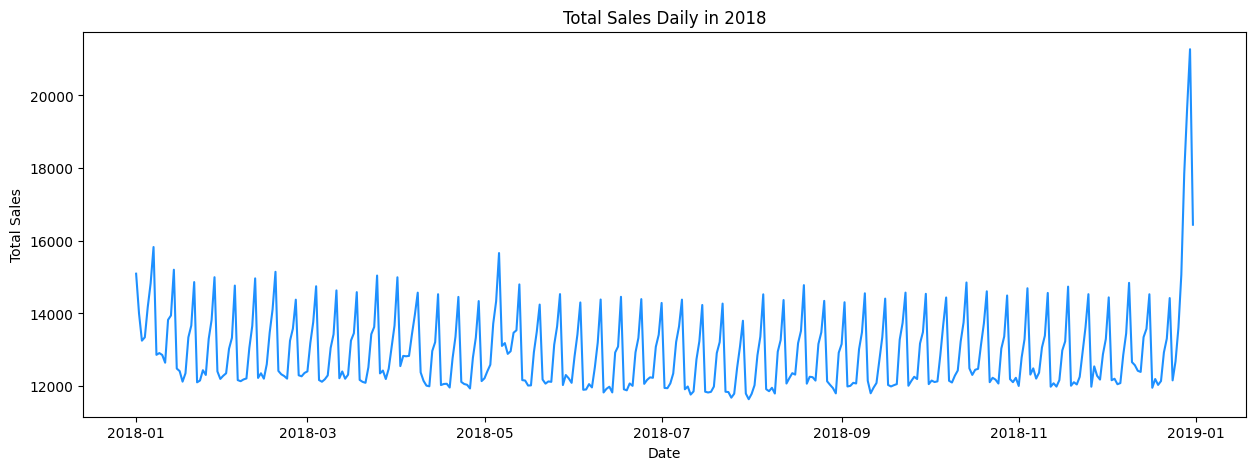

In [10]:
plot_time_series_data(total_sales_daily[ total_sales_daily['year'] == 2018 ], title='Total Sales Daily in 2018')

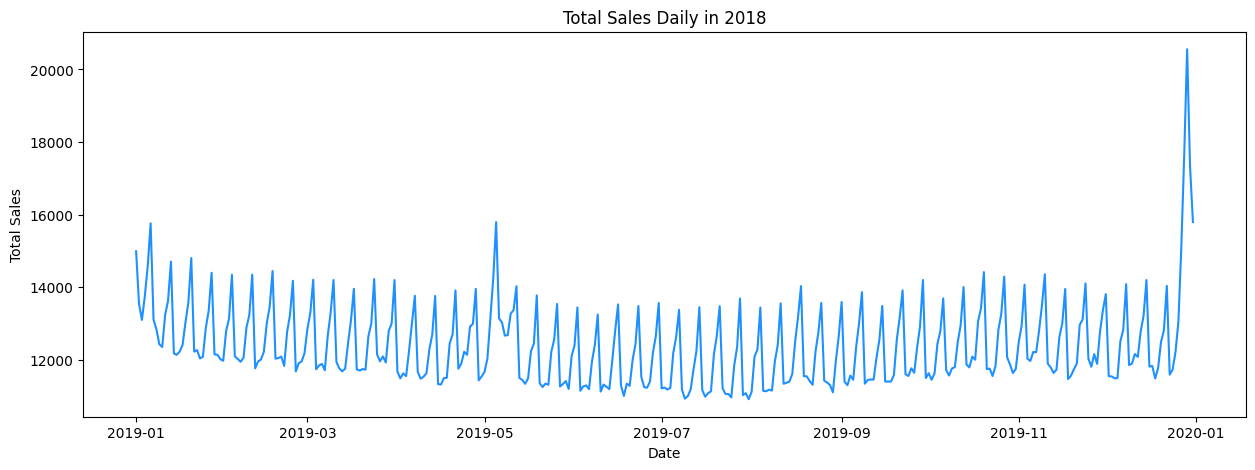

In [11]:
plot_time_series_data(total_sales_daily[ total_sales_daily['year'] == 2019 ], title='Total Sales Daily in 2018')

what are the peaks and what are the valleys?

In [12]:
ten_biggest_days_2019 = total_sales_daily[ total_sales_daily['year'] == 2019].sort_values(by='num_sold', ascending=False).head(10)
ten_biggest_days_2019

,date,num_sold,day,month,year,weekday,is_weekend
1092,2019-12-29,20556,29,12,2019,6,1
1091,2019-12-28,17654,28,12,2019,5,1
1093,2019-12-30,17326,30,12,2019,0,0
1094,2019-12-31,15792,31,12,2019,1,0
854,2019-05-05,15791,5,5,2019,6,1
735,2019-01-06,15756,6,1,2019,6,1
1090,2019-12-27,15111,27,12,2019,4,1
730,2019-01-01,14986,1,1,2019,1,0
749,2019-01-20,14801,20,1,2019,6,1
742,2019-01-13,14703,13,1,2019,6,1


In [13]:
ten_biggest_days_2018 = total_sales_daily[ total_sales_daily['year'] == 2018].sort_values(by='num_sold', ascending=False).head(10)
ten_biggest_days_2018

,date,num_sold,day,month,year,weekday,is_weekend
728,2018-12-30,21273,30,12,2018,6,1
727,2018-12-29,19646,29,12,2018,5,1
726,2018-12-28,17847,28,12,2018,4,1
729,2018-12-31,16443,31,12,2018,0,0
371,2018-01-07,15829,7,1,2018,6,1
490,2018-05-06,15663,6,5,2018,6,1
378,2018-01-14,15204,14,1,2018,6,1
413,2018-02-18,15147,18,2,2018,6,1
365,2018-01-01,15095,1,1,2018,0,0
725,2018-12-27,15066,27,12,2018,3,0


In [14]:
ten_biggest_days_2017 = total_sales_daily[ total_sales_daily['year'] == 2017].sort_values(by='num_sold', ascending=False).head(10)
ten_biggest_days_2017

,date,num_sold,day,month,year,weekday,is_weekend
0,2017-01-01,20086,1,1,2017,6,1
364,2017-12-31,20042,31,12,2017,6,1
363,2017-12-30,19892,30,12,2017,5,1
362,2017-12-29,19237,29,12,2017,4,1
361,2017-12-28,16878,28,12,2017,3,0
1,2017-01-02,15563,2,1,2017,0,0
360,2017-12-27,15076,27,12,2017,2,0
2,2017-01-03,15039,3,1,2017,1,0
343,2017-12-10,15029,10,12,2017,6,1
329,2017-11-26,14797,26,11,2017,6,1


In [15]:
ten_biggest_days_2020 = total_sales_daily[ total_sales_daily['year'] == 2020].sort_values(by='num_sold', ascending=False).head(10)
ten_biggest_days_2020

,date,num_sold,day,month,year,weekday,is_weekend
1456,2020-12-27,16841,27,12,2020,6,1
1458,2020-12-29,16471,29,12,2020,1,0
1459,2020-12-30,16363,30,12,2020,2,0
1460,2020-12-31,15448,31,12,2020,3,0
1457,2020-12-28,15445,28,12,2020,0,0
1099,2020-01-05,14594,5,1,2020,6,1
1113,2020-01-19,14033,19,1,2020,6,1
1095,2020-01-01,13953,1,1,2020,2,0
1428,2020-11-29,13932,29,11,2020,6,1
1442,2020-12-13,13897,13,12,2020,6,1


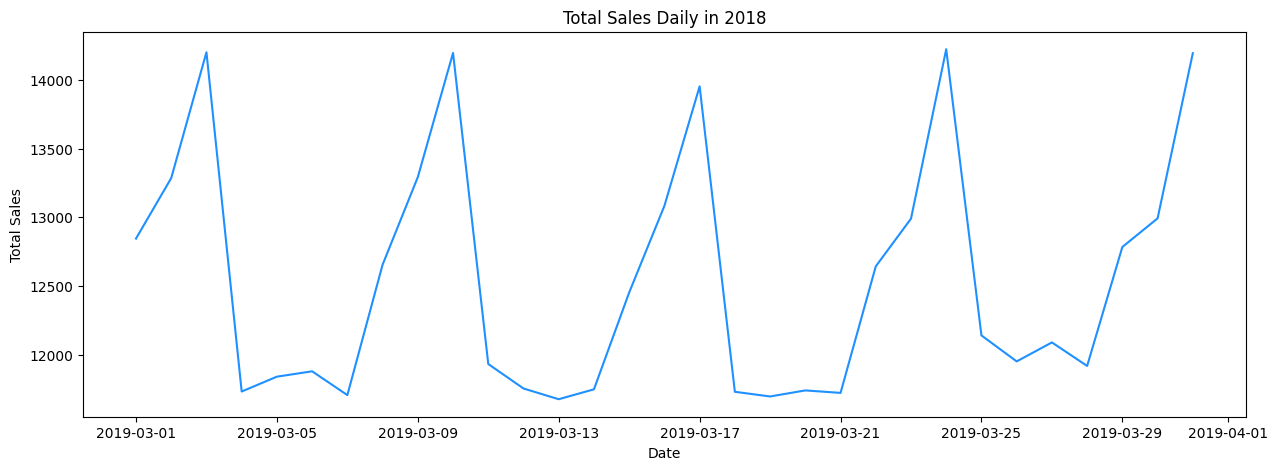

In [16]:
plot_time_series_data(total_sales_daily[ (total_sales_daily['year'] == 2019) & ( total_sales_daily['month'] == 3) ], title='Total Sales Daily in 2018')

has that changed after covid?

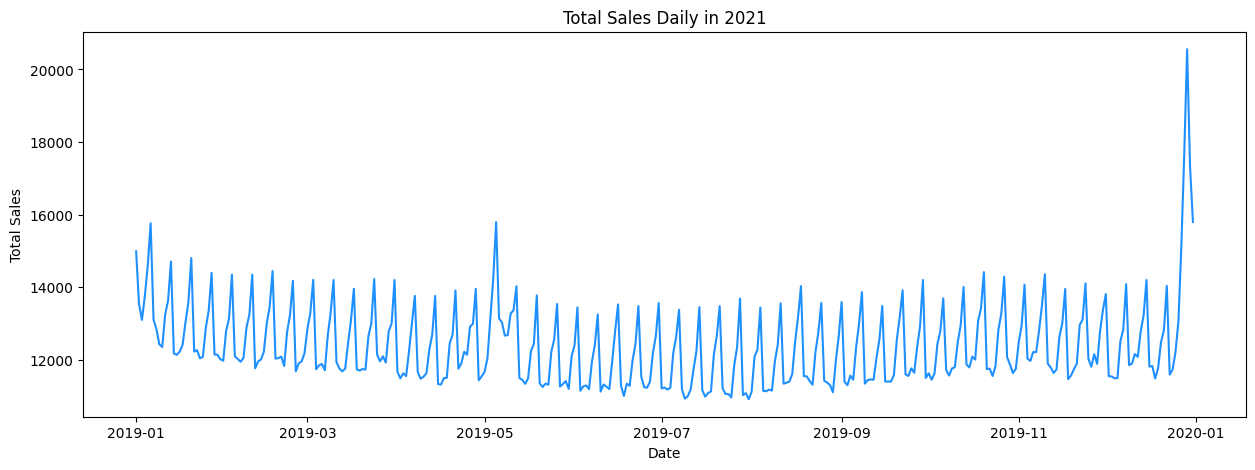

In [17]:
plot_time_series_data(total_sales_daily[ total_sales_daily['year'] == 2019 ], title='Total Sales Daily in 2021')

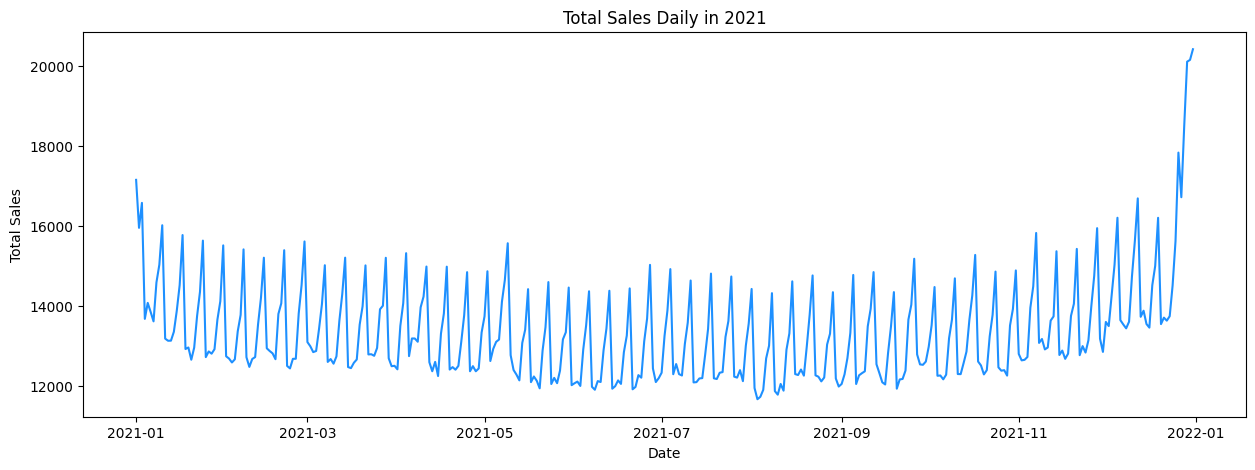

In [18]:
plot_time_series_data(total_sales_daily[ total_sales_daily['year'] == 2021 ], title='Total Sales Daily in 2021')

In [19]:
boxplot_sales_by_column(total_sales_daily[ (total_sales_daily['year'] == 2019) & ( total_sales_daily['month'] == 3)], 'weekday')

NameError: name 'boxplot_sales_by_column' is not defined

In [ ]:
boxplot_sales_by_column(total_sales_daily[ (total_sales_daily['year'] == 2017) & ( total_sales_daily['month'] == 3)], 'weekday')

In [ ]:
boxplot_sales_by_column(total_sales_daily[ (total_sales_daily['year'] == 2020) & ( total_sales_daily['month'] == 3)], 'weekday')

In [ ]:
weekend_sales = total_sales_daily[total_sales_daily['is_weekend'] == 1]['num_sold']
weekday_sales = total_sales_daily[total_sales_daily['is_weekend'] == 0]['num_sold']

sunday_sales = total_sales_daily[total_sales_daily['weekday'] == 6]['num_sold']
saturday_and_sunday_sales = total_sales_daily[total_sales_daily['weekday'].isin([5, 6])]['num_sold']

# show how much percent of sales is on weekend during whole period
print("During whole period:")
print('Weekend sales: {:.2f}%'.format(weekend_sales.sum() / total_sales_daily['num_sold'].sum() * 100))
print('Weekday sales: {:.2f}%'.format(weekday_sales.sum() / total_sales_daily['num_sold'].sum() * 100))
print('Sunday sales: {:.2f}%'.format(sunday_sales.sum() / total_sales_daily['num_sold'].sum() * 100))
print('Saturday and Sunday sales: {:.2f}%'.format(saturday_and_sunday_sales.sum() / total_sales_daily['num_sold'].sum() * 100))

In [ ]:
# 2020 -

before_covid = total_sales_daily[total_sales_daily['date'] < '2020-01-01']

weekend_sales = before_covid[before_covid['is_weekend'] == 1]['num_sold']
weekday_sales = before_covid[before_covid['is_weekend'] == 0]['num_sold']

sunday_sales = before_covid[before_covid['weekday'] == 6]['num_sold']
saturday_and_sunday_sales = before_covid[before_covid['weekday'].isin([5, 6])]['num_sold']

# show how much percent of sales is on weekend during whole period
print("Before covid period:")
print('Weekend sales: {:.2f}%'.format(weekend_sales.sum() / before_covid['num_sold'].sum() * 100))
print('Weekday sales: {:.2f}%'.format(weekday_sales.sum() / before_covid['num_sold'].sum() * 100))
print('Sunday sales: {:.2f}%'.format(sunday_sales.sum() / before_covid['num_sold'].sum() * 100))
print('Saturday and Sunday sales: {:.2f}%'.format(saturday_and_sunday_sales.sum() / before_covid['num_sold'].sum() * 100))

In [ ]:
# 2020 -

after_covid = total_sales_daily[total_sales_daily['date'] >= '2020-01-01']

weekend_sales = after_covid[after_covid['is_weekend'] == 1]['num_sold']
weekday_sales = after_covid[after_covid['is_weekend'] == 0]['num_sold']

sunday_sales = after_covid[after_covid['weekday'] == 6]['num_sold']
saturday_and_sunday_sales = after_covid[after_covid['weekday'].isin([5, 6])]['num_sold']

# show how much percent of sales is on weekend during whole period
print("After covid period:")
print('Weekend sales: {:.2f}%'.format(weekend_sales.sum() / after_covid['num_sold'].sum() * 100))
print('Weekday sales: {:.2f}%'.format(weekday_sales.sum() / after_covid['num_sold'].sum() * 100))
print('Sunday sales: {:.2f}%'.format(sunday_sales.sum() / after_covid['num_sold'].sum() * 100))
print('Saturday and Sunday sales: {:.2f}%'.format(saturday_and_sunday_sales.sum() / after_covid['num_sold'].sum() * 100))

Observations: 

- As described on competition page, dataset contains yearly seasonality (peaks at the beginning of each year)
- Data is inspired by real world as we can see dip in sales in April 2020
- Biggest sales are happening friday, saturday and sunday - 54% of sales happen there

### Countries

In [ ]:
print("Number of unique countries: ", df_train['country'].nunique())
total_sales_by_country = df_train[['country', 'num_sold']].groupby('country').sum().reset_index().sort_values(by='num_sold', ascending=False)
total_sales_by_country

In [ ]:
# assign each country to a color
country_color_palette = dict(zip(total_sales_by_country['country'], sns.color_palette('Set1', len(total_sales_by_country['country']))))

In [ ]:
boxplot_sales_by_column(df_train, 'country', order=total_sales_by_country['country'], color_palette=country_color_palette)

In [ ]:
barplot_sales_by_column(df_train, 'country', order=total_sales_by_country['country'], color_palette=country_color_palette)

In [ ]:
total_sales_by_country_daily = df_train[['date', 'country', 'num_sold']].groupby(['date', 'country']).sum().reset_index()
total_sales_by_country_daily.columns = ['date', 'country', 'num_sold']
total_sales_by_country_daily

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(x='date', y='num_sold', hue='country', data=total_sales_by_country_daily, ax=ax, palette=country_color_palette)
ax.set_xlabel('Date')
ax.set_title('Number of Sales by Country')

Observations: 

- Canada is the biggest country in sales
- Each country follows similar pattern, with two exceptions: Japan does not have its peaks at the beginning of each year, but during the first half. Canada at the beginning of 2021 has a more significant jump in sales compared to other countries.
- Spain during peaks at the beginning of each year surpasses sales in Japan (which, again, has no peaks there)

### store



In [ ]:
print("Number of unique stores: ", df_train['store'].nunique())
total_sales_by_store = df_train[['store', 'num_sold']].groupby('store').sum().reset_index().sort_values(by='num_sold', ascending=False)
total_sales_by_store

In [ ]:
total_sales_by_store_daily = df_train[['date', 'store', 'num_sold']].groupby(['date', 'store']).sum().reset_index()
total_sales_by_store_daily.columns = ['date', 'store', 'num_sold']

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(x='date', y='num_sold', hue='store', data=total_sales_by_store_daily, ax=ax, palette='Set1')

# for each store plot the average number of sales between 2017-01-01 and 2020-01-01
start_date = '2017-01-01'
end_date = '2020-01-01'

total_sales_by_store_daily_2017_2020 = total_sales_by_store_daily[(total_sales_by_store_daily['date'] >= start_date) & (total_sales_by_store_daily['date'] < end_date)]

# for each store calculate its average number of sales
average_sales_by_store = total_sales_by_store_daily_2017_2020[['store', 'num_sold']].groupby('store').mean().reset_index()
average_sales_by_store.columns = ['store', 'average_sales']

# plot the average number of sales for each store as horizontal line on existing plot
for store in average_sales_by_store['store']:
    average_sales = average_sales_by_store[average_sales_by_store['store'] == store]['average_sales'].values[0]
    ax.axhline(y=average_sales, color='black', linestyle='--')

ax.set_xlabel('Date')
ax.set_title('Number of Sales by store')
average_sales_by_store

In [ ]:
# "Kagglazon"

lowest_sales_by_store_kagglazon = df_train[df_train['store'] == 'Kagglazon'][['date', 'num_sold']].groupby('date').sum().reset_index().sort_values(by='num_sold', ascending=True)
lowest_sales_by_store_kagglazon.head(3)

# take lowest value
lowest_sales_kagglazon = lowest_sales_by_store_kagglazon['num_sold'].min()
lowest_sales_kagglazon

# compare the percentage drop in sales using average_sales_by_store
average_sales_kagglazon = average_sales_by_store[average_sales_by_store['store'] == 'Kagglazon']['average_sales'].values[0]

percentage_drop_kagglazon = (lowest_sales_kagglazon - average_sales_kagglazon) / average_sales_kagglazon * 100
"Between the end of 2019 and april 2020, Kagglazon experienced a drop of {:.2f}% in sales".format(percentage_drop_kagglazon)

In [ ]:
# "Kaggle Learn"

lowest_sales_by_store_learn = df_train[df_train['store'] == 'Kaggle Learn'][['date', 'num_sold']].groupby('date').sum().reset_index().sort_values(by='num_sold', ascending=True)
lowest_sales_by_store_learn.head(3)

# take lowest value
lowest_sales_learn = lowest_sales_by_store_learn['num_sold'].min()

# compare the percentage drop in sales using average_sales_by_store
average_sales_learn = average_sales_by_store[average_sales_by_store['store'] == 'Kaggle Learn']['average_sales'].values[0]

percentage_drop_learn = (lowest_sales_learn - average_sales_learn) / average_sales_learn * 100
"Between the end of 2019 and april 2020, Kaggle Learn experienced a drop of {:.2f}% in sales".format(percentage_drop_learn)

In [ ]:
#  "Kaggle Store"

lowest_sales_by_store_store = df_train[df_train['store'] == 'Kaggle Store'][['date', 'num_sold']].groupby('date').sum().reset_index().sort_values(by='num_sold', ascending=True)
lowest_sales_by_store_store.head(3)

# take lowest value
lowest_sales_store = lowest_sales_by_store_store['num_sold'].min()

# compare the percentage drop in sales using average_sales_by_store
average_sales_store = average_sales_by_store[average_sales_by_store['store'] == 'Kaggle Store']['average_sales'].values[0]

percentage_drop_store = (lowest_sales_store - average_sales_store) / average_sales_store * 100
"Between the end of 2019 and april 2020, Kaggle Store experienced a drop of {:.2f}% in sales".format(percentage_drop_store)

Observations: 

- Kagglazon sells consistently the most courses, by an order of magnitude more than Kaggle Learn/Store
- The effect of april 2020 dip is seen more pronounced there, while in Kaggle Learn/Store it's much smaller at first glance
- After calculating the relative drop in sales, it is the same -37% for all three stores

### product

In [ ]:
print("Number of unique products: ", df_train['product'].nunique())
total_sales_by_product = df_train[['product', 'num_sold']].groupby('product').sum().reset_index().sort_values(by='num_sold', ascending=False)
total_sales_by_product

In [ ]:
product_palette = dict(zip(total_sales_by_product['product'], sns.color_palette('Set2', len(total_sales_by_product['product']))))

In [ ]:
total_sales_by_product_daily = df_train[['date', 'product', 'num_sold']].groupby(['date', 'product']).sum().reset_index()
total_sales_by_product_daily.columns = ['date', 'product', 'num_sold']

fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x='date', y='num_sold', hue='product', data=total_sales_by_product_daily, ax=ax, palette=product_palette)
ax.set_xlabel('Date')
ax.set_title('Number of Sales by product')

In [ ]:
products = df_train['product'].unique()
# remove "Using LLMs to Win Friends and Influence People" from products
products = products[products != "Using LLMs to Win Friends and Influence People"]

# for each product plot lineplot of total_sales
for product in products:
    product_sales = total_sales_by_product_daily[total_sales_by_product_daily['product'] == product]
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(x='date', y='num_sold', data=product_sales, ax=ax, color=product_palette[product])
    ax.set_title(f'Number of Sales for {product}')
    plt.show()

Observations:

- here we clearly see the seasonality and periodicallity of our data (except the light green line)

### Country x product

In [ ]:
df_train[['country', 'product', 'num_sold']]

# create a new column called country_x_product
df_train['country_x_product'] = df_train['country'] + ' x ' + df_train['product']
df_train[['country', 'product', 'country_x_product']]
print("Number of unique country x product: ", df_train['country_x_product'].nunique())

# show number of sales for each country x product
total_sales_by_country_x_product = df_train[['country_x_product', 'num_sold']].groupby('country_x_product').sum().reset_index().sort_values(by='num_sold', ascending=False)
total_sales_by_country_x_product